In [1]:
import numpy as np

import getpass
user = getpass.getuser()

In [2]:
from PIL import Image

In [3]:
from omni.isaac.kit import SimulationApp

# "/home/yizhou/Research/OpenAnyDrawer/scene0.usd" # 
usd_path = f"omniverse://localhost/Users/{user}/scene1.usd"


simulation_app = SimulationApp({"headless": True, "open_usd": usd_path,  "livesync_usd": usd_path}) 


Starting kit application with the fillowing args:  ['/home/yizhou/.local/share/ov/pkg/isaac_sim-2022.1.0/exts/omni.isaac.kit/omni/isaac/kit/simulation_app.py', '/home/yizhou/.local/share/ov/pkg/isaac_sim-2022.1.0/apps/omni.isaac.sim.python.kit', '--/app/tokens/exe-path=/home/yizhou/.local/share/ov/pkg/isaac_sim-2022.1.0/kit', '--/persistent/app/viewport/displayOptions=3094', '--/rtx/materialDb/syncLoads=True', '--/rtx/hydra/materialSyncLoads=True--/omni.kit.plugin/syncUsdLoads=True', '--/app/renderer/resolution/width=1280', '--/app/renderer/resolution/height=720', '--/app/window/width=1440', '--/app/window/height=900', '--/renderer/multiGpu/enabled=True', '--ext-folder', '/home/yizhou/.local/share/ov/pkg/isaac_sim-2022.1.0/exts', '--ext-folder', '/home/yizhou/.local/share/ov/pkg/isaac_sim-2022.1.0/apps', '--portable', '--no-window']
Passing the following args to the base kit application:  ['-f', '/home/yizhou/.local/share/jupyter/runtime/kernel-f842a9cb-4659-4751-a5b7-7dee11be5ba6.json

OmniAssetFileFormat


[1.677s] [ext: omni.mdl-0.1.0] startup
[1.699s] [ext: omni.kit.menu.create-1.0.2] startup
[1.700s] [ext: omni.kit.window.file_exporter-1.0.4] startup
[1.701s] [ext: omni.kit.window.drop_support-1.0.0] startup
[1.701s] [ext: omni.kit.material.library-1.3.10] startup
[1.704s] [ext: omni.kit.window.property-1.6.3] startup
[1.706s] [ext: omni.kit.context_menu-1.3.9] startup
[1.710s] [ext: omni.kit.window.file_importer-1.0.4] startup
[1.711s] [ext: omni.kit.stage_templates-1.1.2] startup
[1.714s] [ext: omni.kit.widget.stage-2.6.15] startup
[1.718s] [ext: omni.kit.window.file-1.3.16] startup
[1.720s] [ext: omni.debugdraw-0.1.0] startup
[1.726s] [ext: omni.kit.window.content_browser-2.4.28] startup
[1.738s] [ext: omni.kit.widget.prompt-1.0.1] startup
[1.738s] [ext: omni.kit.property.usd-3.14.8] startup
[1.779s] [ext: omni.hydra.engine.stats-1.0.0] startup
[1.785s] [ext: omni.kit.widget.settings-1.0.0] startup
[1.786s] [ext: omni.graph.tools-1.3.5] startup
[1.873s] [ext: omni.graph.core-2.27.0

2022-08-25 17:10:42 [2,090ms] [Error] [rtx.neuraylib.plugin] [DYNLIB:IO]   0.1   DYNLIB io   error: /home/yizhou/.local/share/ov/pkg/isaac_sim-2022.1.0/kit/python/bin/libs/iray/libnvindex.so: cannot open shared object file: No such file or directory
2022-08-25 17:10:42 [2,090ms] [Error] [rtx.neuraylib.plugin] [INDEX:MAIN]   0.1   INDEX  main error: Failed to load /home/yizhou/.local/share/ov/pkg/isaac_sim-2022.1.0/kit/python/bin/libs/iray/libnvindex.so


Warp initialized:
   Version: 0.2.1
   Using CUDA device: NVIDIA GeForce RTX 3090
   Using CPU compiler: /usr/bin/g++
[2.994s] [ext: omni.kit.window.preferences-1.2.1] startup
[3.038s] [ext: omni.kit.ui_test-1.2.0] startup
[3.041s] [ext: omni.graph.ui-1.6.1] startup
[3.067s] [ext: omni.kvdb-0.0.0] startup
[3.071s] [ext: omni.kit.widget.searchfield-1.0.6] startup
[3.073s] [ext: omni.convexdecomposition-1.4.12] startup
[3.077s] [ext: omni.graph.action-1.17.0] startup
[3.091s] [ext: omni.localcache-0.0.0] startup
[3.094s] [ext: omni.usdphysics-1.4.12] startup
[3.097s] [ext: omni.graph.scriptnode-0.5.0] startup
[3.100s] [ext: omni.physx-1.4.12-5.1] startup
2022-08-25 17:10:43 [3,111ms] [Warning] [omni.kvdb.plugin] wasn't able to load the meta database, trying to repair it ...
2022-08-25 17:10:43 [3,265ms] [Warning] [omni.kvdb.plugin] repair failed
[3.273s] [ext: omni.kit.usd_undo-0.1.0] startup
[3.275s] [ext: omni.graph.nodes-1.25.0] startup
[3.296s] [ext: omni.physx.commands-1.4.12-5.1] s

In [4]:
# world
from omni.isaac.core import World
world = World()

In [5]:
# reset scene
import omni
mobility_prim = world.scene.stage.GetPrimAtPath("/World/Game/mobility")
if mobility_prim:
    omni.kit.commands.execute("DeletePrims", paths=["/World/Game/mobility"])
    
# hide robot
hand_prim = world.scene.stage.GetPrimAtPath("/World/allegro")
hand_prim.GetAttribute('visibility').Set('invisible')

True

In [6]:
from open_env import OpenEnv

env = OpenEnv()

In [7]:
from hand_env import HandEnv

# env = HandEnv("/World/Hand/Bones/l_carpal_mid", "/World/Hand*/Bones/l_thumbSkeleton_grp/l_distalThumb_mid")
controller = HandEnv("/World/allegro*/allegro_mount", "/World/AnchorXform")

In [8]:
env.add_camera()
env.setup_viewport()

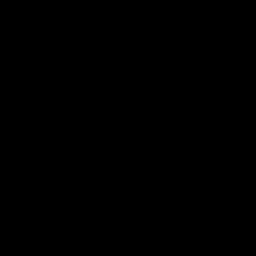

In [9]:
world.render()
env.get_image()

In [10]:
env.add_object(0, scale = 0.1)

add object
loading asset from omni nucleus
physics material: path:  /World/Game/mobility/link_0/visuals/handle_7/physicsMaterial
add physics material to handle


In [11]:
from omni.isaac.core.prims.xform_prim import XFormPrim
mobility_obj = XFormPrim("/World/Game/mobility")
mobility_obj_name = mobility_obj.name

world.scene.add(mobility_obj)

In [12]:
# # reset scene
# replicator_prim = world.scene.stage.GetPrimAtPath("/Replicator")
# if replicator_prim:
#     omni.kit.commands.execute("DeletePrims", paths=["/Replicator"])

p
[6.703s] [ext: omni.isaac.surface_gripper-0.1.2] startup
[6.708s] [ext: omni.kit.property.layer-1.1.2] startup
[6.710s] [ext: omni.isaac.range_sensor-0.4.2] startup
[6.739s] [ext: omni.graph.window.generic-1.3.8] startup
[6.740s] [ext: omni.isaac.utils-0.1.11] startup
[6.744s] [ext: omni.isaac.universal_robots-0.2.1] startup
[6.745s] [ext: omni.kit.property.audio-1.0.5] startup
[6.746s] [ext: omni.kit.property.skel-1.0.1] startup
[6.747s] [ext: omni.kit.property.render-1.1.0] startup
[6.748s] [ext: omni.kit.property.camera-1.0.3] startup
[6.749s] [ext: omni.kit.property.geometry-1.2.0] startup
[6.752s] [ext: omni.kit.property.light-1.0.5] startup
[6.753s] [ext: omni.kit.property.transform-1.0.2] startup
[6.756s] [ext: omni.isaac.occupancy_map-0.2.4] startup
[6.771s] [ext: omni.ui.scene-1.4.6] startup
[6.779s] [ext: omni.kit.window.console-0.2.0] startup
[6.787s] [ext: omni.kit.window.status_bar-0.1.1] startup
[6.793s] [ext: omni.kit.property.bundle-1.2.4] startup
[6.795s] [ext: omni.

2022-08-25 17:12:47 [126,410ms] [Warning] [omni.hydra] Mesh /World/Game/mobility/lsimlation context numpy None
num_envs 1
ink_1/visuals/vertical_side_panel_14 has corrupted data in primvar st_1: buffer size 6 doesn't match expected size 48 in faceVarying primvars
2022-08-25 17:12:47 [126,410ms] [Warning] [omni.hydra] Mesh /World/Game/mobility/link_1/visuals/frame_vertical_bar_25 has corrupted data in primvar st_1: buffer size 18 doesn't match expected size 72 in faceVarying primvars
2022-08-25 17:12:47 [126,410ms] [Warning] [omni.hydra] Mesh /World/Game/mobility/link_1/visuals/base_side_panel_10 has corrupted data in primvar st: buffer size 18 doesn't match expected size 72 in faceVarying primvars
2022-08-25 17:12:47 [126,410ms] [Warning] [omni.hydra] Mesh /World/Game/mobility/link_1/visuals/base_side_panel_10 has corrupted data in primvar st_1: buffer size 18 doesn't match expected size 72 in faceVarying primvars
2022-08-25 17:12:47 [126,410ms] [Warning] [omni.hydra] Mesh /World/Game/

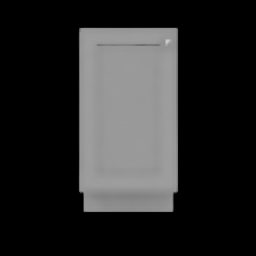

In [13]:
# init
world.reset()
controller.start()
world.scene.add(controller.robots)

world.render()
env.get_image()

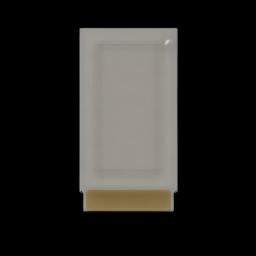

In [14]:
world.render()
env.get_image()

In [15]:
from task.checker import TaskChecker
from task.instructor import SceneInstructor

In [16]:
scene_instr = SceneInstructor()
scene_instr.analysis()
# scene_instr.build_handle_desc_ui()

analysis_spatial_rel:  {'/World/Game/mobility/link_0/visuals/handle_7': {'joint_type': 'PhysicsRevoluteJoint', 'cabinet_type': 'door', 'vertical_description': '', 'horizontal_description': '', 'joint': 'joint_0', 'relative_to_game_center': 'right', 'direction': 'horizontal'}}


In [17]:
scene_instr.is_obj_valid

True

In [18]:
scene_instr.valid_handle_list

{'/World/Game/mobility/link_0/visuals/handle_7': {'joint_type': 'PhysicsRevoluteJoint',
  'cabinet_type': 'door',
  'vertical_description': '',
  'horizontal_description': '',
  'joint': 'joint_0',
  'relative_to_game_center': 'right',
  'direction': 'horizontal'}}

In [19]:
handle_path_str = list(scene_instr.valid_handle_list.keys())[0]

handle_joint_type = scene_instr.valid_handle_list[handle_path_str]["joint_type"]
handle_joint = scene_instr.valid_handle_list[handle_path_str]["joint"]
handle_rel_direciton = scene_instr.valid_handle_list[handle_path_str]["relative_to_game_center"]
handle_direction = scene_instr.valid_handle_list[handle_path_str]["direction"]

In [20]:
handle_path_str, handle_joint_type, handle_joint, handle_rel_direciton

('/World/Game/mobility/link_0/visuals/handle_7',
 'PhysicsRevoluteJoint',
 'joint_0',
 'right')

In [21]:
task_checker = TaskChecker("mobility", handle_joint, handle_joint_type, IS_RUNTIME=True)

# Solve

In [22]:
world.reset()

zontal_bar_29 has corrupted data in primvar st: buffer size 18 doesn't match expected size 48 in faceVarying primvars
2022-08-25 17:12:47 [126,574ms] [Warning] [omni.hydra] Mesh /World/Game/mobility/link_1/visuals/base_side_panel_9 has corrupted data in primvar st: buffer size 36 doesn't match expected size 72 in faceVarying primvars
2022-08-25 17:12:47 [126,574ms] [Warning] [omni.hydra] Mesh /World/Game/mobility/link_1/visuals/frame_horizontal_bar_29 has corrupted data in primvar st_1: buffer size 6 doesn't match expected size 48 in faceVarying primvars
2022-08-25 17:12:47 [126,574ms] [Warning] [omni.hydra] Mesh /World/Game/mobility/link_1/visuals/base_side_panel_10 has corrupted data in primvar st: buffer size 18 doesn't match expected size 72 in faceVarying primvars
2022-08-25 17:12:47 [126,575ms] [Warning] [omni.hydra] Mesh /World/Game/mobility/link_1/visuals/base_side_panel_11 has corrupted data in primvar st: buffer size 6 doesn't match expected size 72 in faceVarying primvars
20

In [24]:
controller.xforms.set_world_poses(positions=np.array([[0,0,0]]), orientations = np.array([[1, 0, 0, 0]])) # WXYZ

for _ in range(60):
    world.step(render=True)

In [25]:
# get grasp location, if handle is horizontal, gripper should be vertical
graps_pos, grasp_rot = controller.calculate_grasp_location(keyword = handle_path_str, 
                                                         verticle = handle_direction == "horizontal")

In [26]:
graps_pos, grasp_rot

(array([[ 0.4999996 , -0.22500871,  0.8448981 ]], dtype=float32),
 array([[0.38268, 0.     , 0.     , 0.92388]], dtype=float32))

# Deep Learning

In [ ]:
scene_instr.load_model()

In [ ]:
image_array =env.get_image(return_array=True)

In [ ]:
scene_instr.predict_bounding_boxes(image_array[:,:,:3])

In [ ]:
v_desc = scene_instr.valid_handle_list[handle_path_str]["vertical_description"]
h_desc = scene_instr.valid_handle_list[handle_path_str]["horizontal_description"]

the_box = scene_instr.get_box_from_desc(v_desc, h_desc)

In [ ]:
the_box

In [ ]:
the_box = [-0.24306170648464168, 0.9585027645051194, -0.2043927986348123, 0.9971716723549489]

In [ ]:
pred_handle_direction = "horizontal" if (the_box[2] - the_box[0]) > (the_box[3] - the_box[1]) else "vertical" 

In [ ]:
pred_handle_direction

In [ ]:
the_box[3] - the_box[1]

In [ ]:
pred_handle_direction

In [ ]:
graps_pos, grasp_rot = controller.calculate_grasp_location_from_pred_box(the_box, False)

In [ ]:
graps_pos, grasp_rot

# Solve

In [27]:
graps_pos[...,0] -= 0.1

In [28]:
controller.xforms.set_world_poses(graps_pos, grasp_rot)

for _ in range(500):
    world.step(render=True)

In [29]:
graps_pos[...,0] += 0.1

In [30]:
controller.xforms.set_world_poses(graps_pos, grasp_rot)

for _ in range(100):
    world.step(render=True)

In [31]:
# close finger

finger_pos = np.array([
    [
     0, 0, 0, np.pi/2 + np.pi/18, 
     np.pi/5, np.pi/5, np.pi/5, 0,
     np.pi/5, np.pi/5, np.pi/5, np.pi/6,
     np.pi/5, np.pi/5, np.pi/5, np.pi/6,
    ],
])

for i in range(120):
    controller.robots.set_joint_position_targets(finger_pos * i / 120) # 
    world.step(render=True)

In [33]:
# pull out
for i in range(300):
    graps_pos[...,0] -= 0.001
#   env.robots.set_world_poses(graps_pos, grasp_rot)
    controller.xforms.set_world_poses(graps_pos, grasp_rot)
    controller.robots.set_joint_position_targets(finger_pos)
    world.step(render=True)

In [ ]:
# check task
task_checker.joint_checker.compute_percentage()

In [35]:
world.reset()
controller.xforms.set_world_poses(positions=np.array([[0,0,0]]), orientations = np.array([[1, 0, 0, 0]])) # WXYZ

for _ in range(30):
    world.step()

In [36]:
world.scene.remove_object(mobility_obj_name)

In [37]:
world.render()

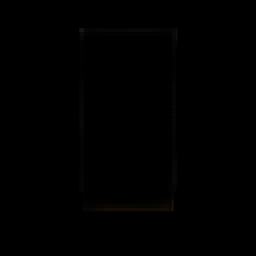

In [38]:
env.get_image()